# Question 1: Hill Height Scalar Field
## The height of a hill is given by the function: ***$h(x,y) = 200 - x^2 - 2y^2$***


## (a) Visualization of the scaler field as 3D surface plot which will show the shape of the hill and 2D contour plots which will show the lines of constant height.

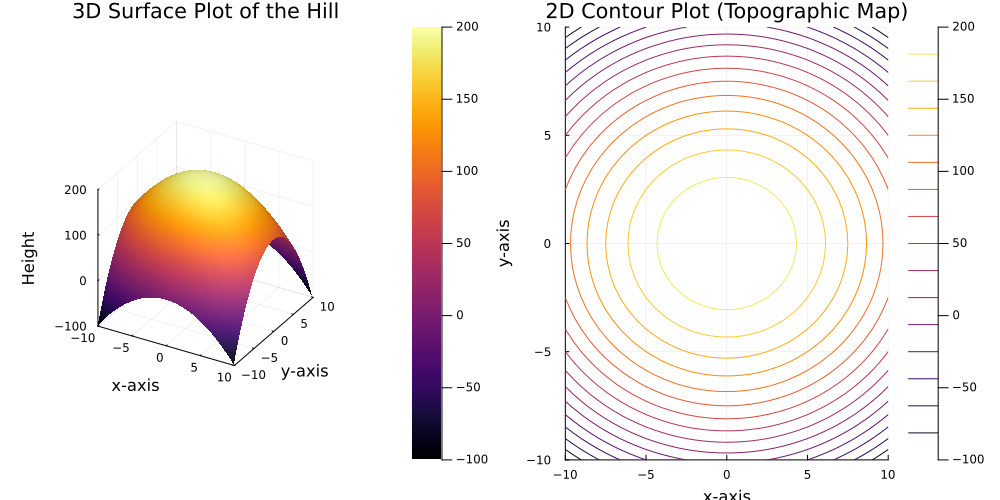

In [ ]:
using Plots
using CalculusWithJulia
h(x, y) = 200 - x^2 - 2*y^2
x = -10:0.5:10
y = -10:0.5:10
p1 = surface(
    x, y, h,
    title="3D Surface Plot of the Hill",
    xlabel="x-axis", ylabel="y-axis", zlabel="Height"
)
p2 = contour(
    x, y, h,
    title="2D Contour Plot (Topographic Map)",
    fill=false,
    xlabel="x-axis", ylabel="y-axis"
)
plot(p1, p2, layout=(1, 2), size=(1000, 500))

## (b) Plotting the gradient of the scalar field using the automatic gradient calculation tool available in Julia

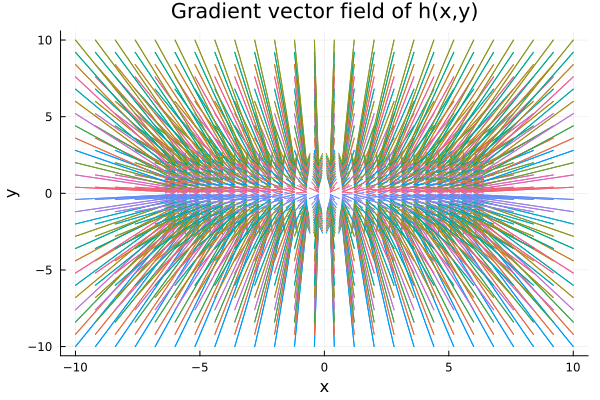

In [23]:
Xgrid = -10:0.8:10
Ygrid = -10:0.8:10
U = [gradient(u -> h(u[1],u[2]),[x,y])[1] for x in Xgrid, y in Ygrid]
V = [gradient(u -> h(u[1],u[2]),[x,y])[2] for x in Xgrid, y in Ygrid]
X = [x for x in Xgrid, y in Ygrid]
Y = [y for x in Xgrid, y in Ygrid]
scale = 0.20
quiver(X,Y, quiver = (U.*=scale,V.*=scale), arrowsize=0.15,  title = "Gradient vector field of h(x,y)", xlabel = "x", ylabel = "y")

## (c) Determination of the gradient vector and plotting the obtained gradient vector field from manual calculation
### Manual calculation:
### The gradient of a scalar field ***$h(x,y) = 200 - x^2 - 2y^2$*** is a vector field defined as:
### ***$\nabla h(x,y) = \frac{\partial h}{\partial x}\mathbf{e}_1 + \frac{\partial h}{\partial y}\mathbf{e}_2$***
### ***$\nabla h(x,y) = -2x\mathbf{e}_1 - 4y\mathbf{e}_2$***

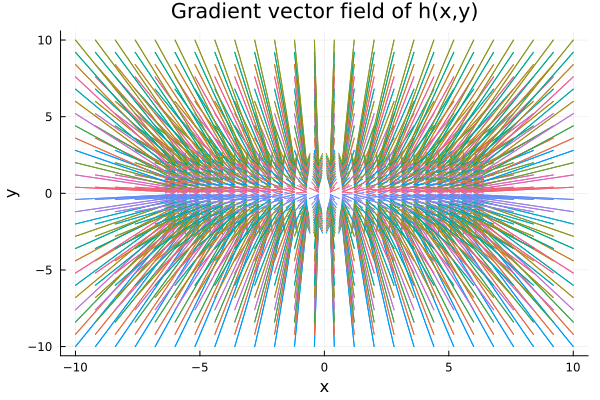

In [24]:
using Plots
scale=0.20
Xgrid = -10:0.8:10
Ygrid = -10:0.8:10
function ObtainedVectorField(x, y)
    v = -2 * x
    u = -4 * y
    return [v,u]
end
V=[ObtainedVectorField(x, y)[1] for x in Xgrid, y in Ygrid]
U=[ObtainedVectorField(x, y)[2] for x in Xgrid, y in Ygrid]

X = [x for x in Xgrid, y in Ygrid]
Y=[y for x in Xgrid, y in Ygrid]
quiver(X,Y, quiver = (V.*=scale,U.*=scale), arrowsize=0.15, title = "Gradient vector field of h(x,y)", xlabel = "x", ylabel = "y") 

# Quesiton 2: Velocity of water particles in a river  
## Vector field of velocity: $$\mathbf{f} = {x}\mathbf{e}_{1} - y^{2}\mathbf{e}_{2}$$
## (a) Plotting the above mentioned vector field

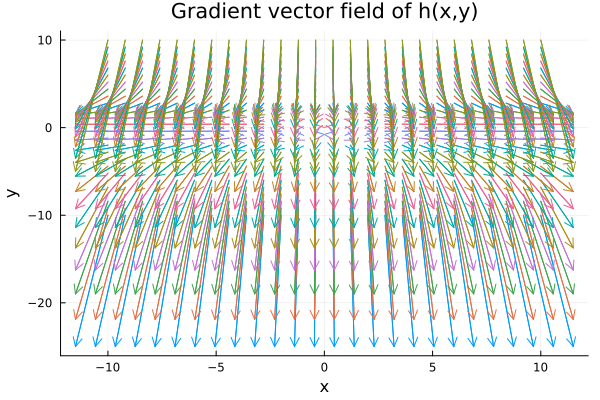

In [29]:
using Plots
scale=0.15
Xgrid = -10:0.8:10
Ygrid = -10:0.8:10
function ObtainedVectorField(x, y)
    v = x
    u = -y^2
    return [v,u]
end
V=[ObtainedVectorField(x, y)[1] for x in Xgrid, y in Ygrid]
U=[ObtainedVectorField(x, y)[2] for x in Xgrid, y in Ygrid]

X = [x for x in Xgrid, y in Ygrid]
Y = [y for x in Xgrid, y in Ygrid]
quiver(X,Y, quiver = (V.*=scale,U.*=scale), arrowsize=0.15, title = "Gradient vector field of h(x,y)", xlabel = "x", ylabel = "y") 

##  (b) Plotting the divergence of the vector field using automatic divergence calculation

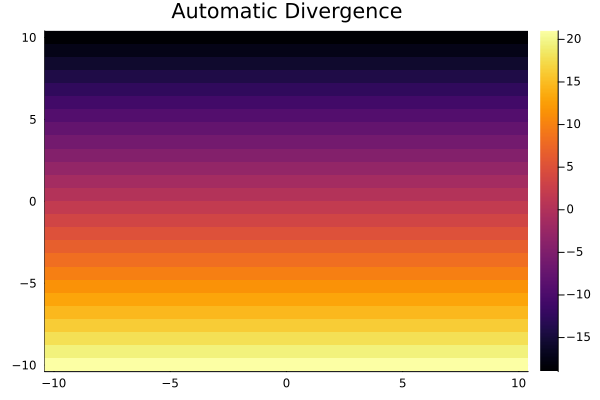

In [39]:
using Plots
Xgrid = -10:0.8:10
Ygrid = -10:0.8:10
function VelocityVector(x,y)
    v=x
    u=-y^2
    return [v,u]
end
div(x,y)=divergence(u -> VelocityVector(u[1],u[2]),[x,y])
p1 = heatmap(Xgrid, Ygrid, div,title="Automatic Divergence")
plot(p1)

##  Plotting the divergence of the vector field using manual divergence calculation
### The divergence of a 2D vector field $\mathbf{f} = {x}\mathbf{e}_{1} - y^{2}\mathbf{e}_{2}$ is given by:
### $$ \text{div}(f) = \nabla \cdot f = \frac{\partial P}{\partial x} + \frac{\partial Q}{\partial y} $$
### For the given field, $P(x, y) = x$ and $Q(x, y) = -y^2$.
### $$ \frac{\partial P}{\partial x} = \frac{\partial}{\partial x}(x) = 1 $$
### $$ \frac{\partial Q}{\partial y} = \frac{\partial}{\partial y}(-y^2) = -2y $$
### $$ div(f) = 1 - 2y $$

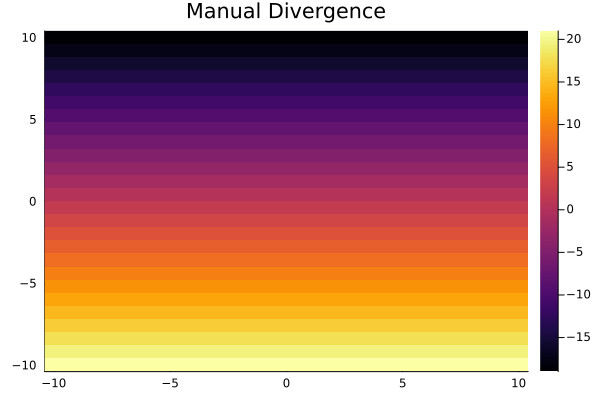

In [11]:
using Plots
Xgrid = -10:0.8:10
Ygrid = -10:0.8:10
function ObtainedDivergence(x, y)
    return 1-(2*y)
end
plot(heatmap(Xgrid,Ygrid,ObtainedDivergence, title = "Manual Divergence"))

# (c) Determination of the curl of the vector field using automatic curl calculation 

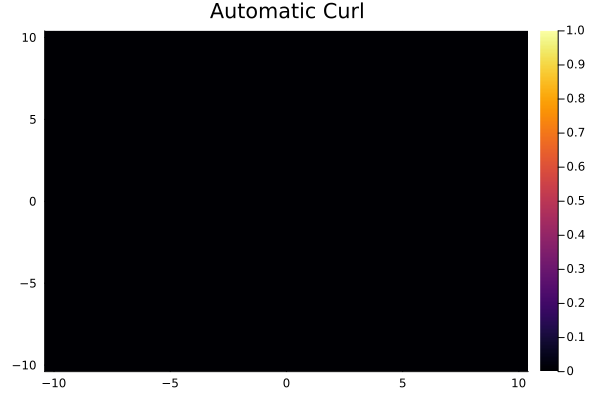

In [28]:
using Plots
using CalculusWithJulia
Xgrid = -10:0.8:10
Ygrid = -10:0.8:10
function VelocityVector(x,y)
    v=x
    u=-y^2
    return [v,u]
end
curlof(x,y)=curl(u -> VelocityVector(u[1],u[2]),[x,y])
p1 = heatmap(Xgrid, Ygrid, curlof,title="Automatic Curl")
plot(p1)

#  Determination of the curl of the vector field using manual curl calculation 
## The curl of a 2D vector field $v(x, y) = P(x, y)\mathbf{e}_1 + Q(x, y)\mathbf{e}_2$ is a scalar quantity given by:
### $$\text{curl}(v) = \frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y}$$
### For the given field, $P(x, y) = x$ and $Q(x, y) = -y^2$.
### $$\frac{\partial Q}{\partial x} = \frac{\partial}{\partial x}(-y^2) = 0$$
### $$\frac{\partial P}{\partial y} = \frac{\partial}{\partial y}(x) = 0$$
### Therefore, the curl is:$$\text{curl}(v) = 0 - 0 = 0$$

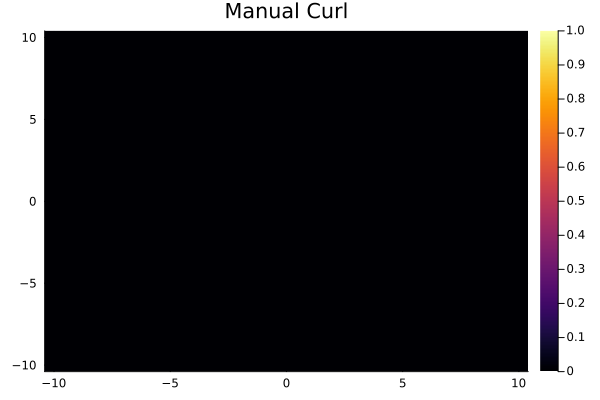

In [29]:
using Plots
Xgrid = -10:0.8:10
Ygrid = -10:0.8:10
function ObtainedCurl(x, y)
    return 0
end
plot(heatmap(Xgrid,Ygrid,ObtainedCurl, title = "Manual Curl"))

# Quesiton 3: Velocity of water particles in a river  
## Vector field of velocity: ***$$ v(x,y)= e^{x}y^{2}\mathbf{e}_{1} + (x + 2y)\mathbf{e}_{2}$$***
## (a) Plotting the above mentioned vector field

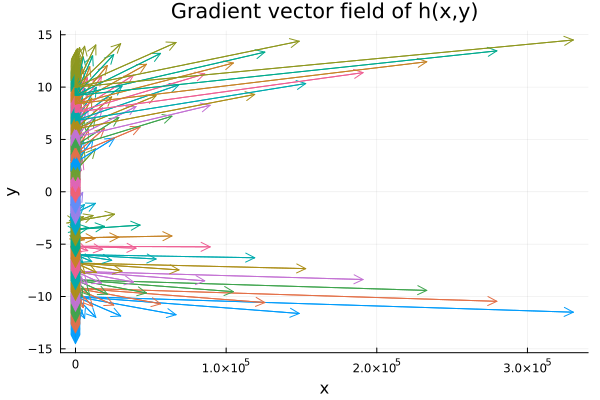

In [6]:
using Plots
scale=0.15
Xgrid = -10:0.8:10
Ygrid = -10:0.8:10
function ObtainedVectorField(x, y)
    v = (exp(1)^x)*(y^2)
    u = x+(2*y)
    return [v,u]
end
V=[ObtainedVectorField(x, y)[1] for x in Xgrid, y in Ygrid]
U=[ObtainedVectorField(x, y)[2] for x in Xgrid, y in Ygrid]

X = [x for x in Xgrid, y in Ygrid]
Y = [y for x in Xgrid, y in Ygrid]
quiver(X,Y, quiver = (V.*=scale,U.*=scale), arrowsize=0.15, title = "Gradient vector field of h(x,y)", xlabel = "x", ylabel = "y") 

##  (b) Plotting the divergence of the vector field using automatic divergence calculation

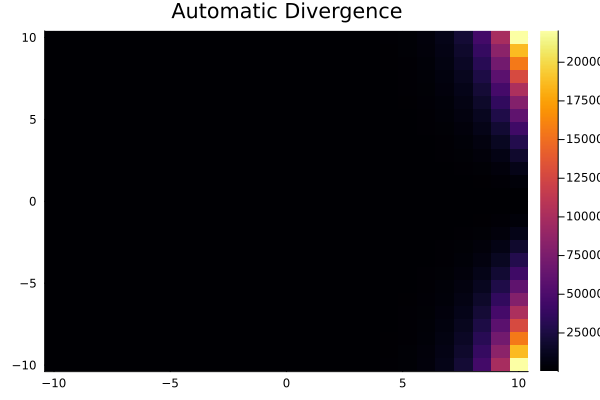

In [10]:
using Plots
using CalculusWithJulia
Xgrid = -10:0.8:10
Ygrid = -10:0.8:10
function VelocityVector(x,y)
    v= (exp(1)^x)*(y^2)
    u= 2
    return [v,u]
end
div(x,y)=divergence(u -> VelocityVector(u[1],u[2]),[x,y])
p1 = heatmap(Xgrid, Ygrid, div,title="Automatic Divergence")
plot(p1)

##  Plotting the divergence of the vector field using manual divergence calculation
### The divergence of a 2D vector field $\mathbf{v} = {e^xy^2}\mathbf{e}_{1} + (x+2y)\mathbf{e}_{2}$ is given by:
### $$ \text{div}(f) = \nabla \cdot f = \frac{\partial P}{\partial x} + \frac{\partial Q}{\partial y} $$
### For the given field, $P(x, y) = e^xy^2$ and $Q(x, y) = x+2y$.
### $$ \frac{\partial P}{\partial x} = \frac{\partial}{\partial x}(e^xy^2) = e^xy^2 $$
### $$ \frac{\partial Q}{\partial y} = \frac{\partial}{\partial y}(x+2y) = 2 $$
### $$ div(f) = e^xy^2 +2 $$

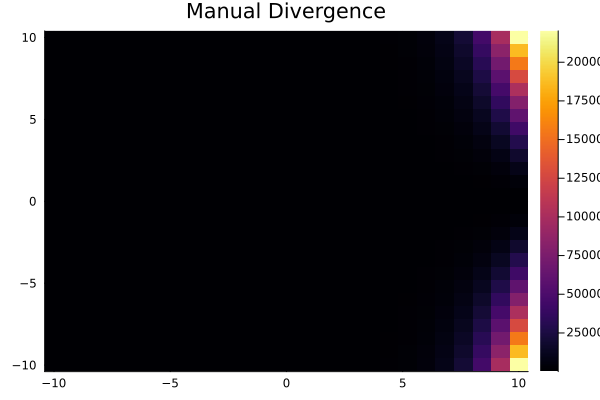

In [12]:
using Plots
Xgrid = -10:0.8:10
Ygrid = -10:0.8:10
function ObtainedDivergence(x, y)
    return (e^x)*(y^2)+2
end
plot(heatmap(Xgrid,Ygrid,ObtainedDivergence, title = "Manual Divergence"))

# (c) Determination of the curl of the vector field using automatic curl calculation 

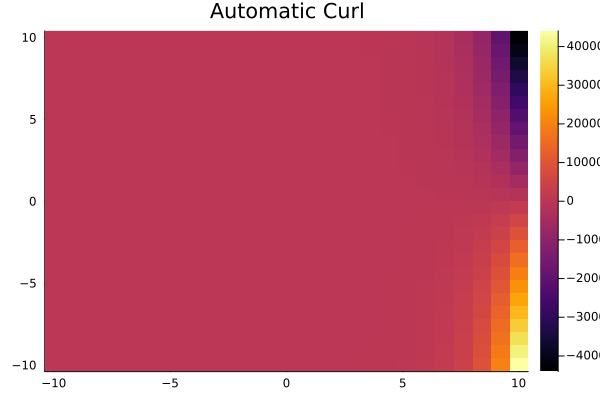

In [27]:
using Plots
using CalculusWithJulia
Xgrid = -10:0.8:10
Ygrid = -10:0.8:10
function VelocityVector(x,y)
    v=(e^x)*(y^2)
    u=x+(2*y)
    return [v,u]
end
curlof(x,y)=curl(u -> VelocityVector(u[1],u[2]),[x,y])
p1 = heatmap(Xgrid, Ygrid, curlof,title="Automatic Curl")
plot(p1)

 # Determination of the curl of the vector field using manual curl calculation 
 ## The curl of a 2D vector field $f(x, y) = \mathbf{v} = {e^xy^2}\mathbf{e}_{1} + (x+2y)\mathbf{e}_{2}$ is a scalar quantity given by:
### $$\text{curl}(f) = \frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y}$$
### For the given field, $P(x, y) = e^x y^2$ and $Q(x, y) = x + 2y$.
### $$ \frac{\partial Q}{\partial x} = \frac{\partial}{\partial x}(x + 2y) = 1$$
### $$ \frac{\partial P}{\partial y} = \frac{\partial}{\partial y}(e^x y^2) = 2ye^x$$
### Therefore, the curl is:$$ \text{curl}(f) = 1 - 2ye^x$$

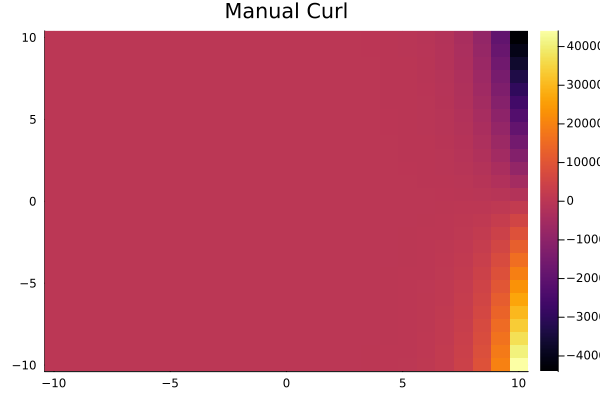

In [30]:
using Plots
Xgrid = -10:0.8:10
Ygrid = -10:0.8:10
function ObtainedCurl(x, y)
    return 1-(2*y*e^x)
end
plot(heatmap(Xgrid,Ygrid,ObtainedCurl, title = "Manual Curl"))

## Question 4:
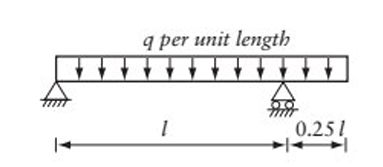
### Structural Analysis
1.  **Support Reactions**:
    * Sum of moments about A ($\sum M_A = 0$):
        $$R_B \cdot l - (q \cdot 1.25l) \cdot \left(\frac{1.25l}{2}\right) = 0$$
        $$R_B = 0.78125ql$$
    * Sum of vertical forces ($\sum F_y = 0$):
        $$R_A + R_B - 1.25ql = 0$$
        $$R_A = 1.25ql - 0.78125ql \implies R_A = 0.46875ql$$

2.  **Shear Force (V) and Bending Moment (M) Equations**:
    * For section AB ($0 \le x \le l$):
        $$V(x) = R_A - qx = 0.46875ql - qx$$
        $$M(x) = R_A x - \frac{qx^2}{2} = 0.46875qlx - \frac{qx^2}{2}$$
    * For section BC ($l < x \le 1.25l$):
        $$V(x) = R_A + R_B - qx = 1.25ql - qx$$
        $$M(x) = R_A x + R_B(x-l) - \frac{qx^2}{2} = 1.25qlx -0.78125ql^2 - \frac{qx^2}{2}$$

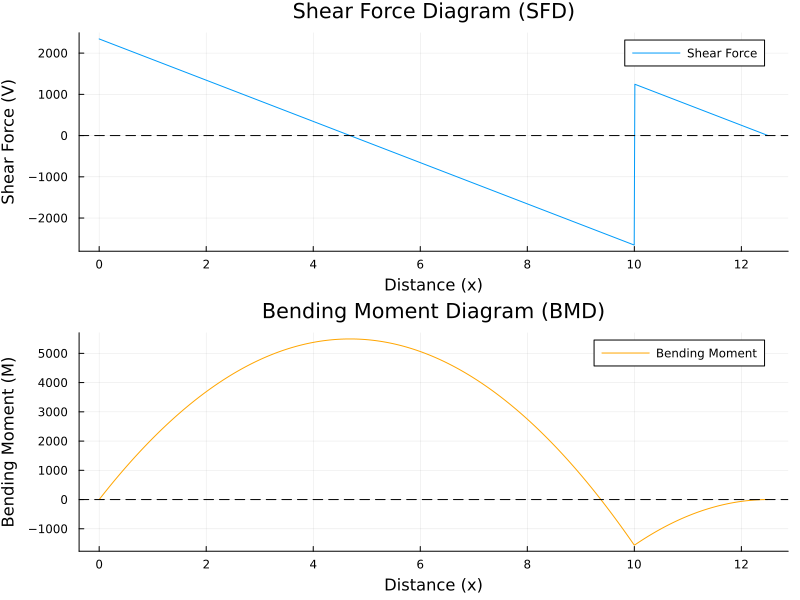

In [18]:
l = 10.0  
q = 500.0  
R_A = 0.46875 * q * l
R_B = 0.78125 * q * l
x_vals = range(0, 1.25 * l, length=1000)
V = zeros(1000)
M = zeros(1000)
for (i) in 1 : 1000
    x=x_vals[i]
    if 0 <= x <= l 
        V[i] = R_A - q * x
        M[i] = R_A * x - q * x^2 / 2
    else  
        V[i] = R_A + R_B - q * x
        M[i] = R_A * x + R_B * (x - l) - q * x^2 / 2
    end
end
p_sfd = plot(x_vals, V,
             title="Shear Force Diagram (SFD)",
             xlabel="Distance (x)",
             ylabel="Shear Force (V)",
             label="Shear Force",
             legend=:topright)
hline!([0], color=:black, linestyle=:dash, label="") 
p_bmd = plot(x_vals, M,
             title="Bending Moment Diagram (BMD)",
             xlabel="Distance (x)",
             ylabel="Bending Moment (M)",
             label="Bending Moment",
             color=:orange)
hline!([0], color=:black, linestyle=:dash, label="")
plot(p_sfd, p_bmd, layout=(2, 1), size=(800, 600))

## Question 5:
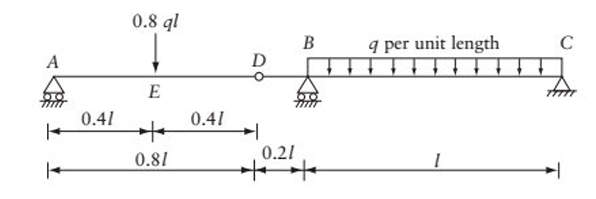
## Structural Analysis
1.  **Analysis at Hinge D**: 
    * **Member AD (Considering the left portion of hinge D)**: 
    * $\sum M_D = 0$:
        $$R_A\cdot (0.4l + 0.4l) - 0.8ql\cdot (0.4l) = 0$$
        $$R_A  = 0.4ql$$

2.  **Support Reactions**: 
    * $\sum M_B = 0$:
        $$R_C \cdot l - (q \cdot l) \cdot \frac{l}{2} - 0.4ql \cdot l +0.8ql \cdot (0.6l) = 0$$
        $$R_C = 0.42ql$$
    * $\sum F_y = 0$:
        $$R_B + R_C + R_A - (q \cdot l) - 0.8q\cdot l = 0$$
        $$R_B = -0.4ql + ql - 0.42ql + 0.8q\cdot l \implies R_B = 0.98ql$$

3.  **SFD and BMD Equations**:
    * **AE ($0 \le x \le 0.4l$)**:
         $$V(x) = R_A = 0.4ql$$
         $$M(x) = R_A x = 0.4qlx$$
    * **ED ($0.4l < x \le 0.8l$)**:
         $$V(x) = R_A - 0.8ql = -0.4ql$$
         $$M(x) = R_A x - 0.8ql(x - 0.4l)$$
    * **DB ($0.8l < x \le 1.0l$)**: (No new loads, equations are the same as ED)
         $$V(x) = -0.4ql$$
         $$M(x) = R_A x - 0.8ql(x - 0.4l)$$
    * **BC ($1.0l < x \le 2.0l$)**:
         $$V(x) = R_A - 0.8ql + R_B - q(x - 1.0l)$$
         $$M(x) = R_A x - 0.8ql(x - 0.4l) + R_B(x - 1.0l) - \frac{q(x-1.0l)^2}{2}$$

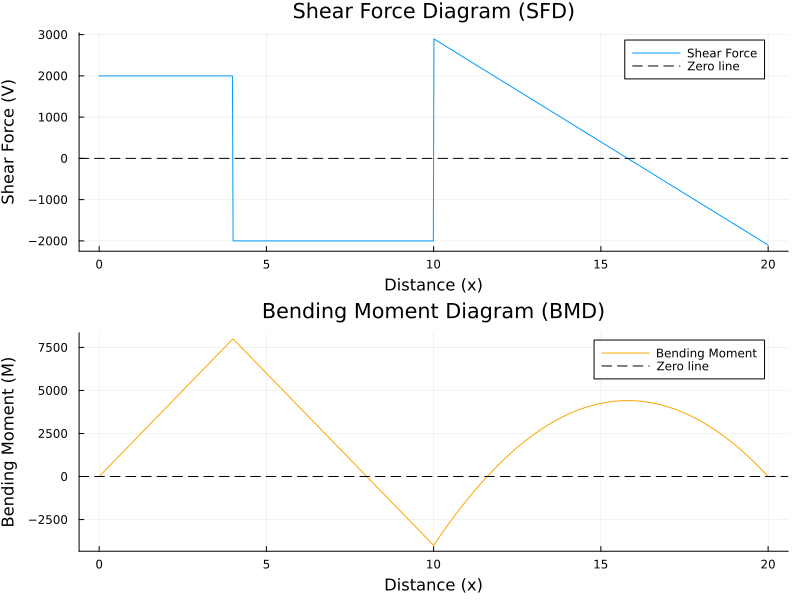

In [1]:
using Plots
l = 10.0  
q = 500.0 
R_A = 0.4 * q * l
R_B = 0.98 * q * l
R_C = 0.42 * q * l
P = 0.8 * q * l
x_vals = range(0, 2*l , length=1000)
V = zeros(1000)
M = zeros(1000)
for (i) in 1:1000
    x=x_vals[i]
    if  0<= x <= 0.4*l
        V[i] = R_A
        M[i] = R_A * x
    elseif  x <= l 
        V[i] = R_A - P
        M[i] = R_A * x - P * (x - 0.4*l)
    else
        V[i] = R_A - P + R_B - q * (x - l)
        M[i] = R_A * x - P * (x - 0.4*l) + R_B * (x - l) - q * (x - l)^2 / 2
    end
end
p_sfd = plot(x_vals, V, label="Shear Force",title="Shear Force Diagram (SFD)", xlabel="Distance (x)", ylabel="Shear Force (V)")
hline!([0], color=:black, linestyle=:dash,label="Zero line")
p_bmd = plot(x_vals, M, label="Bending Moment",title="Bending Moment Diagram (BMD)", xlabel="Distance (x)", ylabel="Bending Moment (M)",color=:orange)
hline!([0], color=:black, linestyle=:dash,label="Zero line")
plot(p_sfd, p_bmd, layout=(2, 1), size=(800, 600))